 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [262]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [263]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [264]:
# Count nulls
whale_df.isnull().sum(axis=0)

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [265]:
# Drop nulls
whale_data = whale_df.dropna()
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [266]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [267]:
# Count nulls
algo_df.isnull().sum(axis=0)

Algo 1    0
Algo 2    6
dtype: int64

In [268]:
# Drop nulls
algo_returns = algo_df.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [269]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace = True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [270]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [271]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$","")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [272]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [273]:
# Drop nulls
sp500_returns.dropna()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [274]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns= {"Close" : "S&P 500 Returns"}, inplace=True)
sp500_returns.head()

,S&P 500 Returns
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


## Combine Whale, Algorithmic, and S&P 500 Returns

In [275]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_returns], axis='columns', join='inner')
combined_df = combined_df.dropna()
combined_df.head() 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

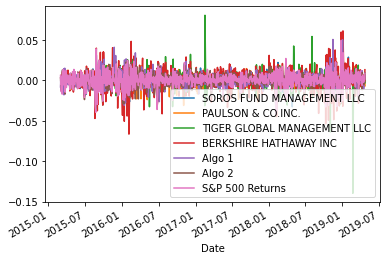

In [276]:
# Plot daily returns of all portfolios
combined_df = pd.concat([whale_df, algo_df, sp500_returns], axis='columns', join='inner')
combined_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

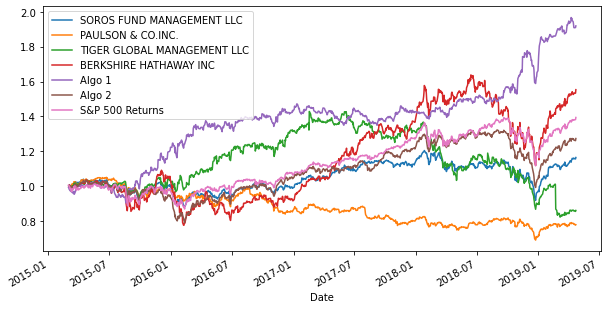

In [277]:
# Calculate cumulative returns of all portfolios
combined_returns = (1 + combined_df).cumprod()
# Plot cumulative returns
combined_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk'}>

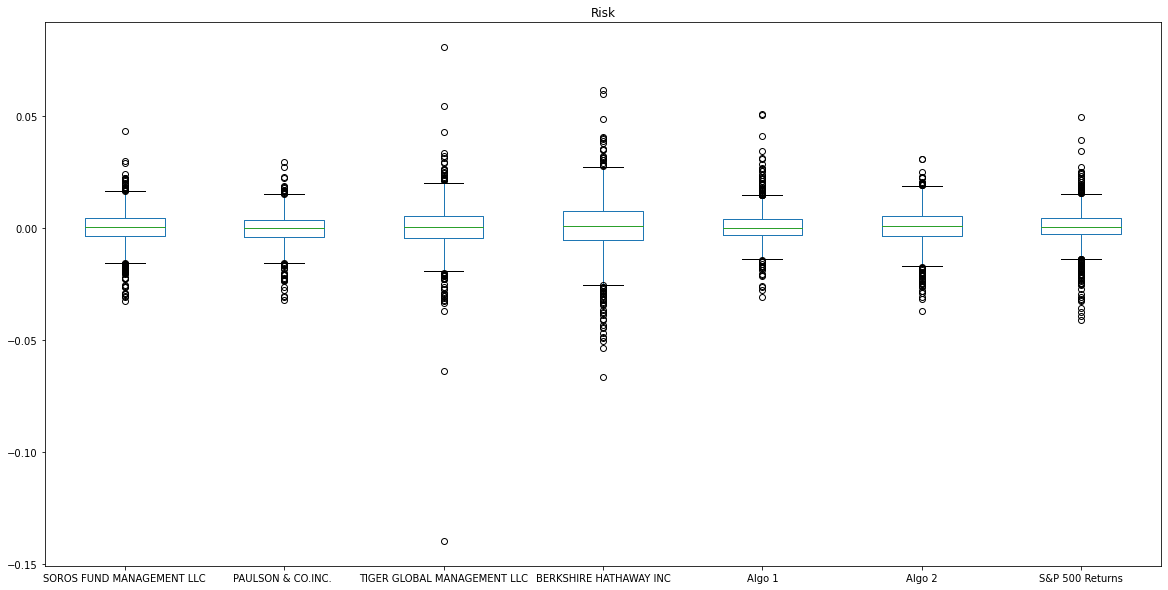

In [278]:
# Box plot to visually show risk
combined_df.plot.box(title= "Risk", figsize=(20,10))  

### Calculate Standard Deviations

In [279]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007621
Algo 2                         0.008339
S&P 500 Returns                0.008551
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [280]:
# Calculate  the daily standard deviation of S&P 500
print(daily_std.sort_values(ascending=False))

# Determine which portfolios are riskier than the S&P 500


"The following portfolios are riskier than the S&P 500: Berkshire Hathaway, Tiger Global Management LLC."

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500 Returns                0.008551
Algo 2                         0.008339
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007621
PAULSON & CO.INC.              0.007023
dtype: float64


'The following portfolios are riskier than the S&P 500: Berkshire Hathaway, Tiger Global Management LLC.'

### Calculate the Annualized Standard Deviation

In [281]:
# Calculate the annualized standard deviation (252 trading days)
daily_std_annual = daily_std * np.sqrt(252)
print(daily_std_annual)



SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120987
Algo 2                         0.132374
S&P 500 Returns                0.135751
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

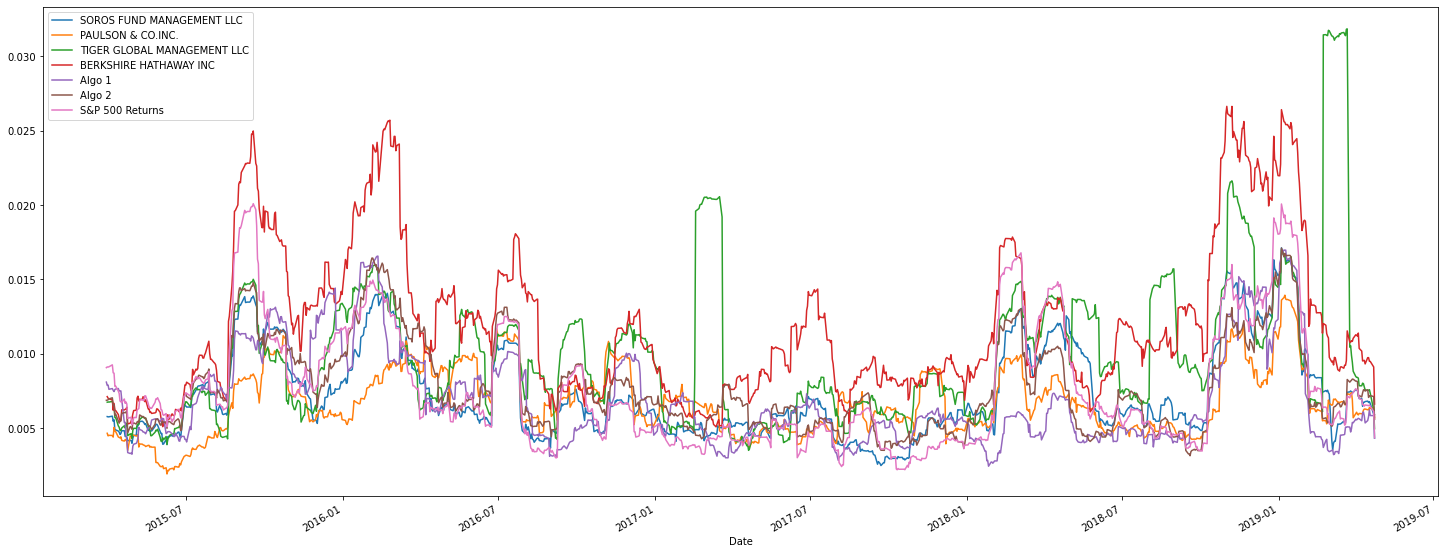

In [282]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21 = combined_df.rolling(window=21).std()
rolling_21.head()

# Plot the rolling standard deviation
rolling_21.plot(figsize=(25,10))

### Calculate and plot the correlation

<AxesSubplot:>

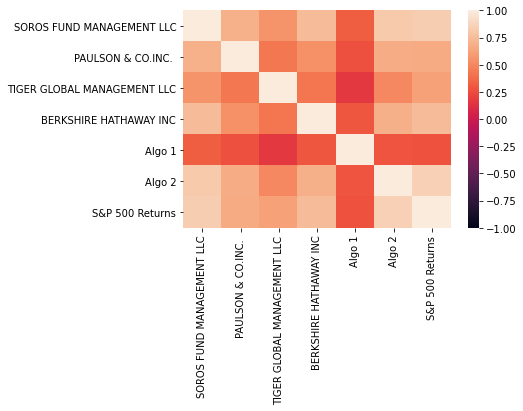

In [283]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmax=1, vmin=-1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

The covariance is 8.302834941861689e-05
The variance is 7.312812672855805e-05
The Beta is 1.1353818719684583


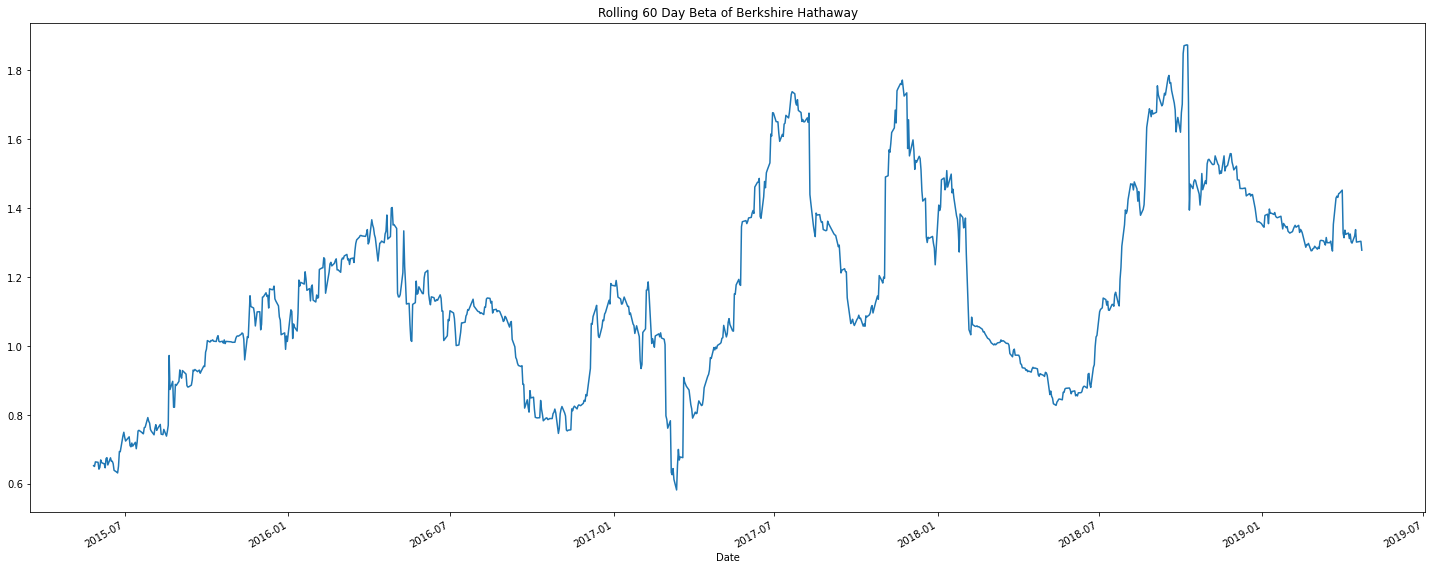

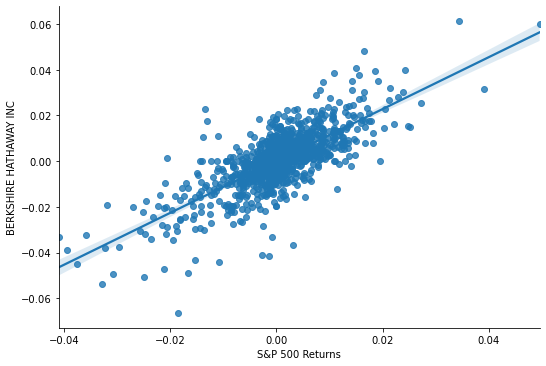

In [284]:
# Calculate covariance of a single portfolio
covariance = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['S&P 500 Returns'])
print(f"The covariance is {covariance}")

# Calculate variance of S&P 500
variance = combined_df['S&P 500 Returns'].var()
print(f"The variance is {variance}")

# Computing beta
Beta = (covariance / variance)
print(f"The Beta is {Beta}")
# Plot beta trend
Beta_Trend = (combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P 500 Returns']))/(combined_df['S&P 500 Returns'].rolling(window=60).var())
Beta_Trend.plot(figsize=(25,10), title= "Rolling 60 Day Beta of Berkshire Hathaway")
#Beta correlation
sns.lmplot(x='S&P 500 Returns', y='BERKSHIRE HATHAWAY INC', data =combined_df, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [285]:
# Use `ewm` to calculate the rolling window
ex_weighted = combined_df.ewm(halflife=21).std().mean()
print(ex_weighted)



SOROS FUND MANAGEMENT LLC      0.007471
PAULSON & CO.INC.              0.006783
TIGER GLOBAL MANAGEMENT LLC    0.010043
BERKSHIRE HATHAWAY INC         0.012105
Algo 1                         0.007144
Algo 2                         0.007937
S&P 500 Returns                0.008000
dtype: float64


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [286]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / ((combined_df.std()) * (np.sqrt(252)))
sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.360829
S&P 500 Returns                0.658706
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.506929
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

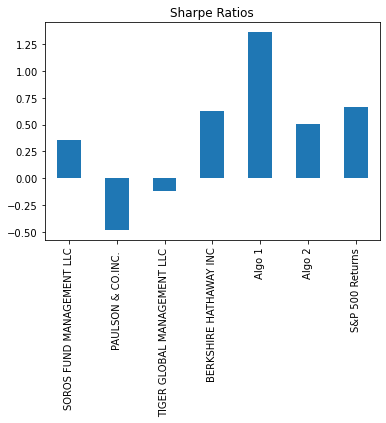

In [287]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

"According to the sharpe ratios of all portfolios Algo 1 would outperform both the S&P 500 and whale portfolios."

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [288]:
# Reading data from 1st stock
goog_data = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [289]:
# Reading data from 2nd stock
aapl_data = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [290]:
# Reading data from 3rd stock
cost_data = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [298]:
# Combine all stocks in a single DataFrame
custom_df = pd.concat([goog_df, aapl_df, cost_df], axis='columns', join='inner')
custom_df = custom_df.dropna()
custom_df.head() 

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62


In [309]:
# Reset Date index
custom_df.reset_index(inplace=True)
custom_df = pd.concat([goog_df, aapl_df, cost_df], axis = 'rows', join = 'inner')


In [310]:
# Reorganize portfolio data by having a column per symbol
custom_df = custom_df.pivot_table(values='NOCP', index='Trade DATE', columns='Symbol')
custom_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [311]:
# Calculate daily returns
custom_returns = custom_df.pct_change()

# Drop NAs
custom_returns.dropna(inplace =True)
# Display sample data
custom_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [313]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = custom_returns.dot(weights)
portfolio_returns.dropna(inplace=True)
# Display sample data

portfolio_returns.head()


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [317]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios = pd.concat([combined_df, portfolio_returns], axis="columns", join="inner")
all_portfolios.rename(columns ={0:"My Portfolio"}, inplace=True)
all_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [318]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios.dropna(inplace=True)
all_portfolios.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500 Returns                0
My Portfolio                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [320]:
# Calculate the annualized `std`
all_portfolios_std = all_portfolios.std()
all_annual_std = all_portfolios_std * np.sqrt(252)
all_annual_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.247155
TIGER GLOBAL MANAGEMENT LLC    0.232531
My Portfolio                   0.211496
S&P 500 Returns                0.152054
SOROS FUND MANAGEMENT LLC      0.146675
Algo 2                         0.139556
Algo 1                         0.133704
PAULSON & CO.INC.              0.116732
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

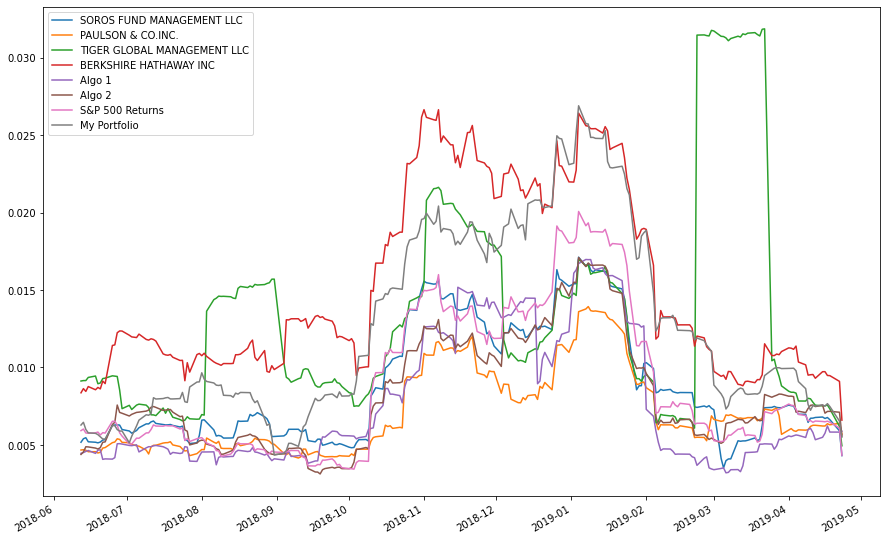

In [321]:
# Calculate rolling standard deviation
all_rolling = all_portfolios.rolling(window=21).std()
# Plot rolling standard deviation
all_rolling.plot(figsize=(15,10))

### Calculate and plot the correlation

<AxesSubplot:>

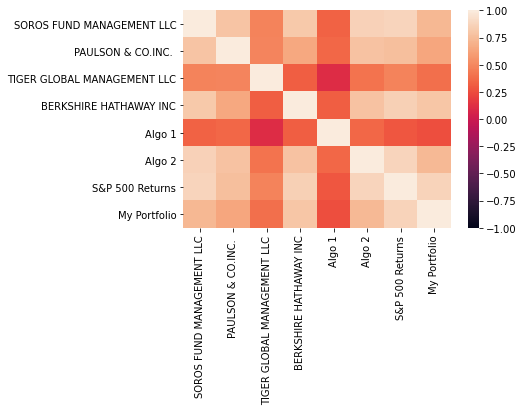

In [322]:
# Calculate and plot the correlation
all_correlation = all_portfolios.corr()
#display
sns.heatmap(all_correlation, vmax=1, vmin=-1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Beta Baby'}>

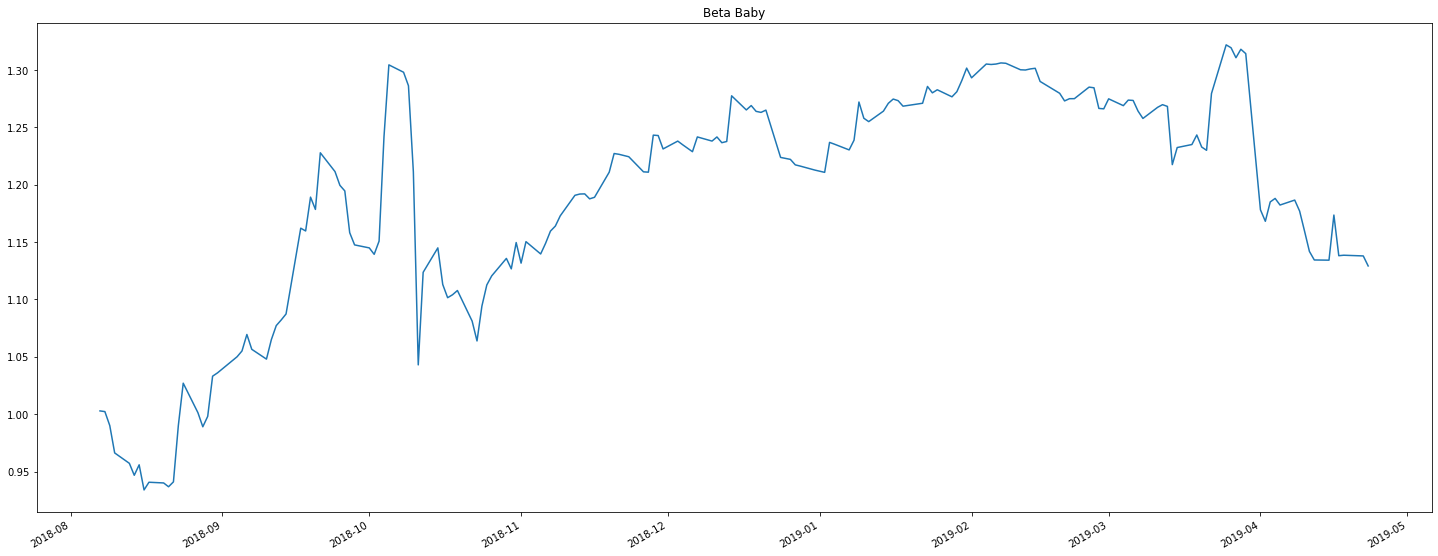

In [328]:
# Calculate and plot Beta
all_beta = (all_portfolios['My Portfolio'].rolling(window=60).cov(all_portfolios['S&P 500 Returns']))/ (all_portfolios['S&P 500 Returns'].rolling(window=60).var())
all_beta.plot(figsize=(25,10), title='Beta Baby')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [329]:
# Calculate Annualzied Sharpe Ratios
all_sharpe_ratios = (all_portfolios.mean() * 252) / ((all_portfolios.std()) * (np.sqrt(252)))
all_sharpe_ratios.sort_values(ascending=False)

Algo 1                         2.035665
My Portfolio                   0.933123
S&P 500 Returns                0.584820
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
BERKSHIRE HATHAWAY INC         0.159756
Algo 2                         0.080607
TIGER GLOBAL MANAGEMENT LLC   -1.034216
dtype: float64

<AxesSubplot:title={'center':'All Portfolios - Sharpe Ratios'}>

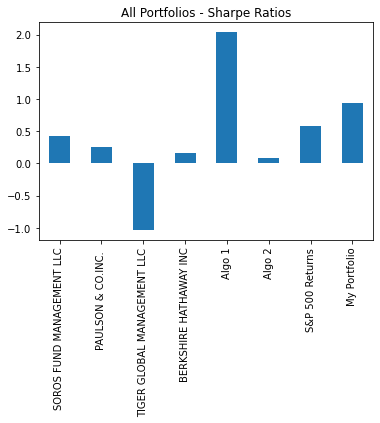

In [330]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar", title="All Portfolios - Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [331]:
"In theory my portfolio will out perform the S&P 500 but is lower than Algo 1.  To minimize risk and secure mad gains it would be best to use a combination of Algo 1, My Portfolio & SPY."

'In theory my portfolio will out perform the S&P 500 but is lower than Algo 1.  To minimize risk and secure mad gains it would be best to use a combination of Algo 1, My Portfolio & SPY.'